<h1>Introduçao ao Python</h1>

##	**Variáveis Inteiras e Reais**

  Não é necessário declarar o tipo:

In [ ]:
x = 1; y = 2.5      #cria duas variaveis (“;” separa dois comandos)
z = x + 2*y     #guarda o resultado na variável z
print(y)
z           #visualiza o valor de z

Outra forma de imprimir é utilizar o comando print (as vezes digitar apenas o nome da variavel não imprime seu valor aqui no colaboratory):

In [ ]:
print('z= ', z) #variavel z do trecho de codigo acima continua existindo
print(z**2)     #elevado ao quadrado
print(z**(1/2)) #raiz

Observe que o trecho de codigo acima só funciona caso o trecho anterior, onde criamos a variável z, seja executado anteriormente. 

Para acessar constantes matemáticas (e várioas operações matemáticas como veremos asseguir), devemos importar uma biblioteca chamada numpy:

In [ ]:
import numpy as np	#importa biblioteca numérica

print(np.pi)	    		#constante π
np.e			#constante: número de Neper ou Euler

## **Vetores e Matrizes**

Podemos declarar vetores diretamente no python, contudo tais objetos serão apenas um conjunto de variáveis, e não um vetor no sentido matemático, e portanto não podem ser operados como tal:

In [ ]:
x = [1, 2, 3]		#array (não é um “objeto matematico”)
y = [4, 5, 6]
x+y			#concatena os arrays

Para criar vetores e matrizes que podem ser operados, iremos utilizar mais um vez a biblioteca numérica numpy:

In [ ]:
import numpy as np	#importa biblioteca numérica. como ja foi feito mais acima, nao seria necessario importar novamente

x = np.array([1, 2, 3])	#cria um vetor linha (“objeto matematico”)
y = np.array([4, 5, 6])
print(x + y)
c = np.array([[1], [2], [3]])  #vetor coluna
print(c)
print('tentativa de adicionar vetores com dimensoes imcompatíveis:\n', x + c) 			#tenta adicionar vetores de tamanhos diferentes
print('soma com dimensões compatíveis:\n ',x + np.transpose(c))	#adicina x com c transposto 
print('multiplicação matricial entre vetores de dimensoes compatíveis:\n',x.dot(c))		#linha vezes coluna
print('Multiplicação ponto a ponto:\n', x*y)			
print('Outra forma de fazer a multiplicação ponto a ponto:\n',np.multiply(x,y))	#operação ponto a ponto
v = np.array([1,2,3])
v = np.concatenate((v,np.array([4,5,6])), axis=0)
print('Concatenado: ', v)

Matrizes são vetores de vetores:

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])	#matriz 3 por 3
print(A)
B = np.eye(3,3)		#matriz identidade 3x3
print(B)
M = A.dot(B)
print(M)
v = x.dot(A)		#podemos multiplicar vetor por matriz. o x vem do trecho de codigo anterior
print('Multiplicando o vetor ', x, 'pela matriz\n', A,'\nobtemos ',v)
v = np.linspace(0,1,10) #cria vetor que vai de 0 até 1 com 10 elementos
print(v)
print(v[0]+v[5])		#acessando elementos do vetor 
print(A[1,2] + B[1][1])	#acessando elementos da matriz: duas formas


 Note que as posições de um vetor vão de 0 a n-1. Ao tentar acessar um vetor ou matriz em uma posição inválida, recebemos um erro.

In [ ]:
A[3,3]			#indice errado

Tambem é possível acessar linhas e colunas de uma matriz:

In [ ]:
print(A[0,:]) #primeira linha e todas as colunas
print(A[:,1]) #todas as linhas da coluna 1. Retorno como linha
print(A[:,1:2]) #todas as linhas da coluna 1 até a coluna 1 (2-1). retorno como coluna
print(A[:,1:3]) #todas as linhas e colunas da 1 até a coluna 3-1 = 2
print(A[0:2,2]) #linhas 0 até 2-1 = 1, coluna 2

## **Formatando saída:**

É possível especificar o número de digitos a serem impressos com o comando format. Isto pode nos mostrar os erros de arredondamento existentes em máquinas com sistemas de ponto flutuante:

In [ ]:
#em binário, 0.1 não é representado exatamente
print(1/10) #impressao padrao. parece perfeito

'{:.25f}'.format(1/10) #imprimir as respostas com 20 casas decimais

Se as variáveis foram da biblioteca numpy, devemos utilzar o segunte comando (pode ser logo após importar a a bilioteca):

In [ ]:
import numpy as np	
np.set_printoptions(precision=15, suppress=True) #maximo 15 digitos, sem notação científica

x = np.array([1/10, 2/7, 3.7, np.pi])	
print(x)

Recomendamos utiilzar 8 casas, que é o padrão, para o desenvolvimento dos códigos da disciplina, assim como sem notação científica, ou seja: np.set_printoptions(precision=8, suppress=True), .

## **Gráficos e imagens**

Para plotar gráficos iremos utilizar a biblioteca matplotlib.

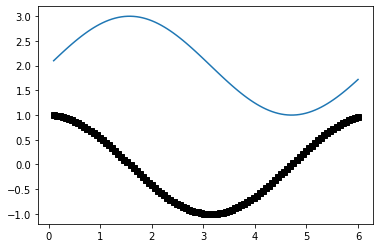

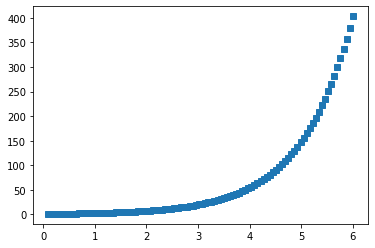

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,6,100)	#cria o vetor x de 0.1 a 6 com 100 elementos
y = np.sin(x)+2		#cria o vetor y de acordo com a função seno
plt.plot(x,y)			#plota x por y (gera gráfico)
z = np.cos(x)
plt.plot(x,z,'ks')		#plota em verde com traço e ponto
w=np.exp(x)		
plt.figure()			#nova figura
plt.plot(x,w,'s')	#plota em quadrados vermelhos( r- red, s - #square)

Tal biblioteca tambem permite trabalhar com imagens:

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread("frame1.jpg")	#garanta que o arquivo existe na pasta do script
t = img.shape
print('tamanho imagem: ', t)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img, extent=[0, t[1], 0, t[0]]) #mudar escala e a orientação dos eixos
ax.plot(330, 120, '.', linewidth=5, markersize=20, color='r') #ponto vermelho sobre img

## **Funções**

É possível definir funções que recebem parametros e retornam resultados. Lembrar que dentro da função não podemos acessar variáveis que foram criadas fora desta. As variaveis devem ser ou recebidas como argumentos ou criadas dentro da funcao.

**Obs: em python não existe marcador para o fim de um bloco de código (no nosso caso, o termino de uma definição de função). Isso é feito através da identação.**

In [ ]:
from google.colab import files

uploaded = files.upload()
img = plt.imread('cnlabatt.jpg')

t = img.shape
print(100, t)



In [ ]:
def func(x):		# função com um argumento
    return x**2 - 4	#e com um retorno
	

#chamada da funcao
print(func(3))
y = 2
print(func(y))
w = func(y+2)
print(w)

É possível receber vários argumentos e retornar vários resutlados:

In [ ]:
def func3args(x,y,z):		#funcao com 3 args
    a = func(x);  #função fun previamente definida
    b = func(y);
    c = func(func(z));
    return (a,b,c)
r = func3args(1,2,3)
print(r)
[j,k,l] = func3args(1,2,3)	#chama a funcao e guarda  a saida nas variaveis #j, k e l
print('saidas: ', j, k, l)

## **Estruturas de Controle**

Prestar sempre atenção à identação!

In [ ]:
#Comando If
y = int(input("digite o valor (inteiro) de y: "))
x = int(input("digite o valor (inteiro) de x: "))
if x == y :
  print('o valor de x é igual ao valor de y')	#imprime mensagem na tela
else:
  print('o valor de x é diferente do valor de y')
print('acabou o else, pois a identação recuou')

In [ ]:
#Comando while
cont = 0
while cont != 5:		#enquanto cont diferente de 5
    print('iteracao numero  ', cont)	
    cont +=1
print('acabou o while')

In [ ]:
#Comando for
import numpy as np

y = range(10,20,2)  #de 10 até 20, incremento de 2
for z in y:
    print('z=', z)
print("acabou")

a = np.linspace(0,10,21) #de 0 a 10 com 21 pontos
for x in a:
    print(x)

for i in range(1,10): #de 1 a 10 com incremento padrao (1)
	    if i%2 == 0:
	        print('o numero  ', i, ' eh par')	
	    else:
	        print('o numero  ', i,  ' eh impar')	

## **Entrada de dados**

Uma forma mais eficiente de entrar com dados de vetores e matrizes é digitar todos os elementos, separador por vírgula, em uma unica linha, e em seguida fazer o tratamento de tais dados.

In [ ]:
import numpy as np
np.set_printoptions(precision=8, suppress=True)
print("Digite os elementos do vetor, separados por vírgula: ")
texto=input()
a=texto.split(',')
x=np.empty([len(a)],dtype=float)
for i in range(len(a)): #de 0 a n-1, onde n eh o numero de elementos de a
  x[i]=float(a[i])
print(x)

print("Digite os elementos de uma matriz 3x3, separados por vírgula: ")
texto=input()
a=texto.split(',')
m=np.empty([3,3],dtype=float)
for i in range(3):
  for j in range(3):
    m[i,j]=float(a[i*3+j])
print(m)

## **Tarefas**


1.   Escreva uma função que plote o gráfico da função $x\cdot cos(x) + x^2$ no intervalo de zero a $2\pi$

2.   Escreva uma função que receba 2 pontos 2D (cada um com suas cordenadas x e y)  e retorne a distancia euclididana entre eles.

3.   Escreva uma função que calcule o seno de um angulo utilizando a expansão em série de Taylor. O usuário deve passar como argumento o ângulo e o número de termos da série de Taylor a serem utilizados. A função deve retornar o valor do seno calculado, o valor do seno dado pela função sin(x) que já existe na biblioteca numpy do python, e o erro relativo cometido no seu calculo quando comparado com o valor dado pela função do scilab.

\begin{equation}
sen(x)=x-x^3/3!+x^5/5!-x^7/7!+⋯
\end{equation}

	
4.    Crie uma função que chama a sua função seno escrita no exercício anterior, para um determinado ângulo mas para vários números de termos da série de Taylor diferentes (isto é, variando apenas o segundo argumento). Armazene o valor calculado e o erro relativo em um vetor, e em seguida plote dois gráficos: um que mostra o valor real do seno e o valor do seno calculado para cada números de termos da série de Taylor; outro que mostra a evolução do erro relativo vs números de termos da série de Taylor.

